# MA 705 Data Science – Project

**Topic:** Adolescent Fertility Rate (World Bank Indicator)

**Course:** MA 705 Data Science  

**Instructor:** Jiaying Weng

**Group1:** Zhongyi Li, Isaiah Gomes

**Date:** 11/15/2025

### Documenting Data Sources

**a. Where the data is coming from and which institution provides it**

The data for this project comes from the World Bank’s World Development Indicators (WDI) database. Specifically, I use the indicator “Adolescent fertility rate (births per 1,000 women ages 15–19)”. The dataset is provided by the World Bank.

**b. Format of the raw data**

The raw data are provided as comma-separated values CSV files. The main file, `API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv`, contains a table where each row represents a country or aggregate region and the columns include country identifiers followed by one column for each calendar year. A second CSV file, `Metadata_Country_API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv`, contains country-level metadata such as region and income group. Both files are plain text CSVs that can be read directly into Python using `pandas`.

**c. Nature of the data**

The dataset is a longitudinal dataset that records adolescent fertility rates by country and year. For each country–year combination, the main variable is the number of births per 1,000 women aged 15–19. The time coverage starts in 1960 and extends to the most recent year available in the current download, with some missing values for certain countries or years. The geographic coverage includes most countries in the world, as well as several regional aggregates defined by the World Bank. The World Development Indicators are generally updated once per year when new national data become available, so the dataset is based on official, regularly updated statistics that are suitable for cross-country and over-time comparisons.


## Dataset Description

In this project, I use data on adolescent fertility rates from the World Bank’s World Development Indicators (WDI). The specific indicator is called “Adolescent fertility rate (births per 1,000 women ages 15–19)” and its code is `SP.ADO.TFRT`. I downloaded the data from the World Bank Open Data website, which is an official public data source provided by the World Bank Group. The World Bank collects and compiles these indicators from national statistical offices and international agencies, and then publishes them in a consistent format for researchers and policymakers.

The main raw data file is named `API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv`. This file is a comma-separated values (CSV) file. After skipping the descriptive header lines at the top, each row in the table represents one country or regional aggregate (for example a specific country such as Afghanistan, or a broader region such as “Africa Eastern and Southern”). The first columns identify the country and the indicator through fields such as “Country Name”, “Country Code”, “Indicator Name” and “Indicator Code”. After these identifier columns, each remaining column corresponds to a calendar year, starting from 1960 and continuing up to the most recent years (for example 2023, with an extra mostly empty column for 2024 in this version of the file). The cell values in these year columns are the adolescent fertility rates for that country and year, measured as the number of births per 1,000 women ages 15–19. Some entries are missing, especially for earlier time periods or the newest year.

I also use a second CSV file with additional metadata for each country, called `Metadata_Country_API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv`. In this metadata file, each row again represents a country or region identified by a “Country Code”, and there are extra variables that describe the country. Important examples include the country’s “Region” (such as “Sub-Saharan Africa” or “Latin America & Caribbean”) and its “IncomeGroup” (such as “Low income”, “Lower middle income” or “High income”). There are also some text fields like “SpecialNotes” and “TableName”. Some columns in this metadata file are empty and will be dropped during cleaning. I will merge this metadata with the main indicator file using the country code, so that each observation has both the adolescent fertility rate and the region and income group information attached.

Overall, the nature of the data is a longitudinal dataset where the basic unit of observation is a country–year pair. For each country and each year, the main variable of interest is the adolescent fertility rate. The time coverage begins in 1960 and extends through the most recent year available in the current download, which allows me to study long-term trends over several decades. The geographic coverage includes most countries in the world, along with some regional aggregates defined by the World Bank. The World Development Indicators are typically updated once per year when new national statistics become available, so this dataset reflects official and relatively up-to-date information. Because the World Bank harmonizes the data across countries, the dataset is suitable for cross-country comparison and for analyzing how adolescent fertility evolves over time across different regions and income groups.

In the analysis, I will first reshape the main indicator file from wide format (with one column per year) into a tidy long format where each row contains a country code, a year and the corresponding adolescent fertility rate. Then I will join this tidy dataset to the country metadata file so that I can compare adolescent fertility patterns by region and by income group, and use these variables later in visualization and modeling.


### Retrieval of the Raw Data

**a. How the data were retrieved and what was automated**

To retrieve the adolescent fertility data, I first went to the World Bank Open Data website and searched for the indicator with code `SP.ADO.TFRT` (“Adolescent fertility rate (births per 1,000 women ages 15–19)”). On the indicator page, I used the CSV download option and saved the files `API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv` and `Metadata_Country_API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv` into a local `data/` folder inside my project directory. This initial download step was done manually through the browser and is not automated.

After the files were saved locally, all the later steps were automated in the notebook using Python code. In particular, the notebook automatically locates the `data/` folder and reads the CSV files into `pandas` DataFrames each time the notebook is run. 

In [93]:
from pathlib import Path
import pandas as pd

# Set up the project and data paths
project_dir = Path(".") 
data_dir = project_dir / "Adolescent fertility rate"

main_path = data_dir / "API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv"
meta_path = data_dir / "Metadata_Country_API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv"

df_raw = pd.read_csv(main_path, skiprows=4)

df_meta_raw = pd.read_csv(meta_path)

print(df_raw.shape)
print(df_meta_raw.shape)

(266, 70)
(265, 6)


### From Raw Data to Tidy Tabular Data in pandas

**a. Steps to transform the raw data into pandas DataFrames**

The raw adolescent fertility data from the World Bank are initially stored as CSV files in a local `data/` folder. To work with these data in Python, we first loaded the CSV files into `pandas` DataFrames. For the main indicator file (`API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv`), we needed to skip four descriptive header lines at the top of the file so that the fifth line would be read as the actual column header row. We used `pd.read_csv(..., skiprows=4)` to achieve this.

After reading the main file, we dropped an extra column called `Unnamed: 69`, which is completely empty and does not contain any meaningful information. The remaining columns include the country identifiers (`Country Name`, `Country Code`, `Indicator Name`, `Indicator Code`) followed by one column for each year from 1960 to 2024. Because this structure is in “wide” format (with one column per year), we reshaped the DataFrame into a tidy “long” format using `pd.melt`. In the long format, each row represents a single country–year pair, with one column holding the year and another column holding the adolescent fertility rate. We renamed this value column to something descriptive such as `Adolescent_Fertility`, converted the `Year` column to an integer type, and removed rows where the fertility rate is missing.

For the metadata file (`Metadata_Country_API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv`), we read it directly into a second DataFrame with `pd.read_csv`. We then kept only the useful columns (`Country Code`, `Region`, `IncomeGroup`, `TableName`, `SpecialNotes`) and dropped the empty `Unnamed: 5` column. Finally, we merged the tidy fertility DataFrame with the metadata DataFrame on `Country Code`, so that each observation includes both the adolescent fertility rate and the region and income group information. At the end of these steps, we obtained a tidy pandas DataFrame with one row per country–year, and columns for the country name, country code, year, adolescent fertility rate, region, and income group.


In [94]:
from pathlib import Path
import pandas as pd


project_dir = Path.cwd()

data_dir = project_dir / "Adolescent fertility rate"

main_path = data_dir / "API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv"
meta_path = data_dir / "Metadata_Country_API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv"

# 1. Read file
df_raw = pd.read_csv(main_path, skiprows=4)

# Drop the empty column if it exists
if "Unnamed: 69" in df_raw.columns:
    df_raw = df_raw.drop(columns=["Unnamed: 69"])

# 2. Convert from wide (one column per year) to long tidy format
id_vars = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
df_long = df_raw.melt(
    id_vars=id_vars,
    var_name="Year",
    value_name="Adolescent_Fertility"
)

# Clean types and drop missing values
df_long["Year"] = df_long["Year"].astype(int)
df_long = df_long.dropna(subset=["Adolescent_Fertility"])

# 3. Read and clean metadata
df_meta = pd.read_csv(meta_path)
df_meta = df_meta[["Country Code", "Region", "IncomeGroup", "TableName", "SpecialNotes"]]

# 4. Merge tidy fertility data with country metadata
df_tidy = df_long.merge(df_meta, on="Country Code", how="left")

df_tidy.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Adolescent_Fertility,Region,IncomeGroup,TableName,SpecialNotes
0,Aruba,ABW,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,44.732000,Latin America & Caribbean,High income,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,135.792572,NaN,NaN,Africa Eastern and Southern,"26 countries, stretching from the Red Sea in t..."
2,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,140.598000,Middle East & North Africa,Low income,Afghanistan,The reporting period for national accounts dat...
3,Africa Western and Central,AFW,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,161.129238,NaN,NaN,Africa Western and Central,"22 countries, stretching from the westernmost ..."
4,Angola,AGO,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,92.548000,Sub-Saharan Africa,Lower middle income,Angola,The World Bank systematically assesses the app...


### Data Enrichment

**a. Work done to enrich the data (joins, groupby, aggregation)**

After transforming the raw adolescent fertility data into a tidy format, enriched the dataset by adding country-level information from the metadata file. The tidy fertility DataFrame (`df_long`) contains one row per country–year, with columns for `Country Name`, `Country Code`, `Year`, and `Adolescent_Fertility`. Separately, the metadata file (`Metadata_Country_API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv`) contains additional variables for each country code, including its World Bank region and income group.

To enrich the fertility data, we first read the metadata CSV into a pandas DataFrame and selected only the relevant columns, such as `Country Code`, `Region`, and `IncomeGroup`. We then performed a left join (merge) on `Country Code`, so that each row in the fertility dataset gained the corresponding region and income group values. This step created an enriched DataFrame (`df_tidy`) that combines the original fertility rates with the contextual information needed for analysis by region and income level.

Once the merge was complete, we used `groupby` and aggregation operations to compute summary statistics. For example, I grouped the enriched data by `Region` and `Year` and calculated the mean adolescent fertility rate within each region–year combination. I also grouped by `IncomeGroup` and `Year` to examine how average adolescent fertility differs across income levels over time. These grouping and aggregation steps produce higher-level views of the data that are easier to interpret than raw country-level values and help highlight broader patterns and trends.

In [95]:
import pandas as pd
from pathlib import Path
 
project_dir = Path(".")
data_dir = project_dir / "Adolescent fertility rate"

main_path = data_dir / "API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv"
meta_path = data_dir / "Metadata_Country_API_SP.ADO.TFRT_DS2_en_csv_v2_14702.csv"

# 1. Read and tidy the main indicator data
df_raw = pd.read_csv(main_path, skiprows=4)
if "Unnamed: 69" in df_raw.columns:
    df_raw = df_raw.drop(columns=["Unnamed: 69"])

id_vars = ["Country Name", "Country Code", "Indicator Name", "Indicator Code"]
df_long = df_raw.melt(
    id_vars=id_vars,
    var_name="Year",
    value_name="Adolescent_Fertility"
)

df_long["Year"] = df_long["Year"].astype(int)
df_long = df_long.dropna(subset=["Adolescent_Fertility"])

# 2. Read metadata and select enrichment variables
df_meta = pd.read_csv(meta_path)
df_meta = df_meta[["Country Code", "Region", "IncomeGroup"]]

# 3. Enrich fertility data by merging with metadata
df_tidy = df_long.merge(df_meta, on="Country Code", how="left")

# 4. mean fertility by region and year and by income group and year
region_year_summary = (
    df_tidy
    .groupby(["Region", "Year"], as_index=False)["Adolescent_Fertility"]
    .mean()
    .rename(columns={"Adolescent_Fertility": "Mean_Adolescent_Fertility"})
)

income_year_summary = (
    df_tidy
    .groupby(["IncomeGroup", "Year"], as_index=False)["Adolescent_Fertility"]
    .mean()
    .rename(columns={"Adolescent_Fertility": "Mean_Adolescent_Fertility"})
)

region_year_summary.head(), income_year_summary.head() #do we need to show the whole table?

(                Region  Year  Mean_Adolescent_Fertility
 0  East Asia & Pacific  1960                  72.397946
 1  East Asia & Pacific  1961                  70.705676
 2  East Asia & Pacific  1962                  70.925324
 3  East Asia & Pacific  1963                  69.998568
 4  East Asia & Pacific  1964                  67.845784,
    IncomeGroup  Year  Mean_Adolescent_Fertility
 0  High income  1960                  65.256616
 1  High income  1961                  64.624326
 2  High income  1962                  63.771337
 3  High income  1963                  63.185477
 4  High income  1964                  62.875419)

### 5. Data Cleaning

In this section we describe the main steps we used to clean and standardize the adolescent fertility dataset in pandas. The goal of the cleaning process was to obtain a tidy DataFrame with clear column names, consistent data types, and a transparent strategy for handling missing values and duplicates.

**i. Renaming columns with explicit column names**

After merging the fertility data with the country metadata, we had a DataFrame called `df_tidy` that still used the original World Bank column names such as `Country Name`, `Country Code`, `Adolescent_Fertility`, `Region`, and `IncomeGroup`. To make the column names easier to work with in Python, we created a cleaned version of this DataFrame with more explicit and consistent names in snake_case. For example, we renamed `Country Name` to `country_name`, `Country Code` to `country_code`, and `Adolescent_Fertility` to `adolescent_fertility`. This renaming step makes the code more readable and reduces the risk of typos.


In [96]:
# Start from the enriched tidy DataFrame
df_clean = df_tidy.rename(
    columns={
        "Country Name": "country_name",
        "Country Code": "country_code",
        "Indicator Name": "indicator_name",
        "Indicator Code": "indicator_code",
        "Adolescent_Fertility": "adolescent_fertility",
        "Region": "region",
        "IncomeGroup": "income_group"
    }
)

In [97]:
# Ensure Year is integer
df_clean["Year"] = df_clean["Year"].astype(int)

# Ensure adolescent_fertility is numeric
df_clean["adolescent_fertility"] = pd.to_numeric(
    df_clean["adolescent_fertility"], errors="coerce"
)

# create a decade variable for some summary plots
df_clean["decade"] = (df_clean["Year"] // 10) * 10


In [98]:
# Drop rows where the main outcome is missing
df_clean = df_clean.dropna(subset=["adolescent_fertility"])

# fill missing region or income_group with a label
df_clean["region"] = df_clean["region"].fillna("Unknown")
df_clean["income_group"] = df_clean["income_group"].fillna("Unknown")


In [99]:
# Check for duplicate country–year combinations
dupes = df_clean[df_clean.duplicated(subset=["country_code", "Year"], keep=False)]

print("Number of duplicate country-year rows:", len(dupes))

# If duplicates existed, we could drop them as follows:
df_clean = df_clean.drop_duplicates(subset=["country_code", "Year"])


Number of duplicate country-year rows: 0


In [100]:
# Save cleaned data for the website
df_clean.to_csv("website/df_clean.csv", index=False)

### Tests for Data Quality

To make sure that my data-cleaning and enrichment steps were performed correctly, I included several simple data-quality tests in the notebook. These tests are implemented using Python `assert` statements and basic summary checks in pandas. They help verify that the final cleaned DataFrame has the structure and content that I expect.

**1. Checking for missing values in key variables**

After cleaning the data, I expect the main outcome variable `adolescent_fertility` to have no missing values, because I explicitly dropped rows where this variable was `NaN`. I also expect that `country_code` and `Year` should always be present, since they identify each observation. I used `assert` statements to verify these conditions. If any of these checks fail, Python will raise an error, which tells me that something went wrong in the earlier cleaning steps.


In [101]:
# Check that the main outcome has no missing values
assert df_clean["adolescent_fertility"].isna().sum() == 0, "Missing values in adolescent_fertility"

# Check that the identifiers are not missing
assert df_clean["country_code"].isna().sum() == 0, "Missing country_code values"
assert df_clean["Year"].isna().sum() == 0, "Missing Year values"


In [102]:
n_rows = len(df_clean)
print("Number of rows in df_clean:", n_rows)

# Sanity check: make sure we have at least 10,000 rows but not more than 100,000
assert 10_000 <= n_rows <= 100_000, "Unexpected number of rows in df_clean"


Number of rows in df_clean: 16960


In [103]:
min_val = df_clean["adolescent_fertility"].min()
max_val = df_clean["adolescent_fertility"].max()
print("Range of adolescent_fertility:", min_val, "to", max_val)

assert min_val >= 0, "Found negative fertility rates"
assert max_val <= 300, "Fertility rates seem unreasonably large"

Range of adolescent_fertility: 0.465 to 229.604


In [104]:
print("Year range:", df_clean["Year"].min(), "to", df_clean["Year"].max())

assert df_clean["Year"].min() >= 1960, "Year values earlier than 1960 found"
assert df_clean["Year"].max() <= 2024, "Year values later than 2024 found"

Year range: 1960 to 2023


In [105]:
duplicate_mask = df_clean.duplicated(subset=["country_code", "Year"], keep=False)
n_dupes = duplicate_mask.sum()
print("Number of duplicate country-year rows:", n_dupes)

assert n_dupes == 0, "Found duplicate country-year combinations in df_clean"

Number of duplicate country-year rows: 0


### Data analysis

In this section, I perform basic statistical analysis of the adolescent fertility dataset and use simple regression models to study how adolescent fertility changes over time and across regions and income groups. I focus on option (a) from the project guidelines, which is to apply basic statistics and machine learning methods to the labeled data, rather than predicting outcomes for unlabeled data.

#### 1. Descriptive statistics

First, I use descriptive statistics to summarize the distribution of adolescent fertility rates. I compute the overall mean, median and standard deviation, and I look at these summary statistics separately by region and by income group. This helps me understand which regions and income levels tend to have higher or lower adolescent fertility.

In [106]:
# Mean adolescent fertility by region (across all years)
region_summary = (
    df_clean
    .groupby("region", as_index=False)["adolescent_fertility"]
    .agg(["mean", "median", "std", "count"])
    .reset_index()
    .rename(columns={
        "mean": "mean_fertility",
        "median": "median_fertility",
        "std": "sd_fertility",
        "count": "n_obs"
    })
)
region_summary.head()

# Mean adolescent fertility by income group (across all years)
income_summary = (
    df_clean
    .groupby("income_group", as_index=False)["adolescent_fertility"]
    .agg(["mean", "median", "std", "count"])
    .reset_index()
    .rename(columns={
        "mean": "mean_fertility",
        "median": "median_fertility",
        "std": "sd_fertility",
        "count": "number_of_obs"
    })
)
income_summary.head()

,index,income_group,mean_fertility,median_fertility,sd_fertility,number_of_obs
0,0,High income,39.703074,30.245500,33.623921,5504
1,1,Low income,130.041278,135.896000,48.486353,1600
2,2,Lower middle income,94.486782,91.878500,45.815298,3200
3,3,Unknown,81.978286,78.304764,44.866869,3200
4,4,Upper middle income,68.195750,57.183000,42.916170,3456


In [107]:
# Average adolescent fertility by income group and year
income_year_trends = (
    df_clean
    .groupby(["income_group", "Year"], as_index=False)["adolescent_fertility"]
    .mean()
    .rename(columns={"adolescent_fertility": "mean_fertility"})
)

income_year_trends.head()


,income_group,Year,mean_fertility
0,High income,1960,65.256616
1,High income,1961,64.624326
2,High income,1962,63.771337
3,High income,1963,63.185477
4,High income,1964,62.875419


In [108]:
import statsmodels.formula.api as smf

# Simple linear regression
model1 = smf.ols(
    formula="adolescent_fertility ~ Year",
    data=df_clean
).fit()

print(model1.summary())

                             OLS Regression Results                             
Dep. Variable:     adolescent_fertility   R-squared:                       0.130
Model:                              OLS   Adj. R-squared:                  0.130
Method:                   Least Squares   F-statistic:                     2545.
Date:                  Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                          16:49:15   Log-Likelihood:                -89270.
No. Observations:                 16960   AIC:                         1.785e+05
Df Residuals:                     16958   BIC:                         1.786e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2024.2880     38.698

In [109]:
# Regression with year and income group
model2 = smf.ols(
    formula="adolescent_fertility ~ Year + C(income_group)",
    data=df_clean
).fit()

print(model2.summary())

                             OLS Regression Results                             
Dep. Variable:     adolescent_fertility   R-squared:                       0.438
Model:                              OLS   Adj. R-squared:                  0.438
Method:                   Least Squares   F-statistic:                     2645.
Date:                  Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                          16:49:15   Log-Likelihood:                -85565.
No. Observations:                 16960   AIC:                         1.711e+05
Df Residuals:                     16954   BIC:                         1.712e+05
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [110]:
# Regression with interaction between year and income group
model3 = smf.ols(
    formula="adolescent_fertility ~ Year * C(income_group)",
    data=df_clean
).fit()

print(model3.summary())

                             OLS Regression Results                             
Dep. Variable:     adolescent_fertility   R-squared:                       0.439
Model:                              OLS   Adj. R-squared:                  0.439
Method:                   Least Squares   F-statistic:                     1475.
Date:                  Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                          16:49:15   Log-Likelihood:                -85552.
No. Observations:                 16960   AIC:                         1.711e+05
Df Residuals:                     16950   BIC:                         1.712e+05
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

### Visualizations

In this section, we created six visualizations to explore patterns in adolescent fertility across countries, regions, income groups, and over time. We briefly describe each figure, the main trends, and the customizations we used to highlight important patterns.

#### 1. Histogram of adolescent fertility (overall distribution)

The first visualization is a histogram of the `adolescent_fertility` variable using all country–year observations in the cleaned dataset. This plot shows how the fertility rates are distributed and whether there are many very high or very low values.

From this plot, we can see that most adolescent fertility values are concentrated at relatively lower levels (for example between 0 and 100 births per 1,000 women aged 15–19), but there is a long right tail with some country–year combinations where adolescent fertility is much higher. This suggests large differences across countries and time periods.

**Customizations:**  
We chose a moderate number of bins (for example 30) to balance detail and smoothness and set the x-axis limits to focus on the range where almost all data points lie. We also added axis labels and a title to clearly indicate that the histogram shows adolescent fertility rates per 1,000 women aged 15–19.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: nicer default style
plt.style.use("default")

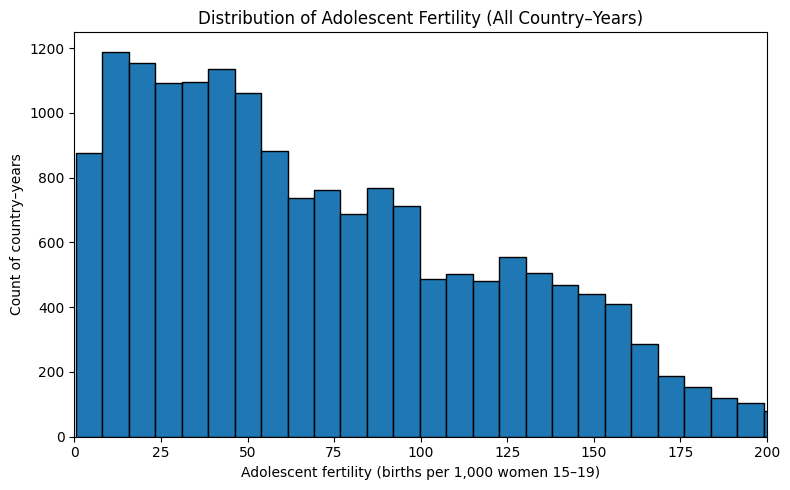

In [112]:
plt.figure(figsize=(8, 5))

plt.hist(
    df_clean["adolescent_fertility"],
    bins=30,
    edgecolor="black"
)

plt.xlabel("Adolescent fertility (births per 1,000 women 15–19)")
plt.ylabel("Count of country–years")
plt.title("Distribution of Adolescent Fertility (All Country–Years)")
plt.xlim(0, 200)  # focus on typical range; adjust if needed

plt.tight_layout()
plt.savefig("website/figs/hist_adolescent_fertility.png", dpi=300, bbox_inches="tight")
plt.show()


#### 2. Boxplots of adolescent fertility by income group

The second visualization is a set of boxplots comparing the distribution of adolescent fertility across World Bank income groups (for example “Low income”, “Lower middle income”, “Upper middle income”, and “High income”). Each boxplot summarizes the distribution of fertility rates within one income group over all years and countries in that category.

This figure shows that low-income and lower-middle-income countries tend to have higher adolescent fertility on average, with larger spread, while upper-middle and high-income countries have lower median fertility and fewer extreme high values. The boxplots make the differences in central tendency and variability between income groups easy to compare.

**Customizations:**  
We ordered the income groups from “Low income” to “High income” on the x-axis to make the pattern more intuitive. We also used a horizontal grid to help compare medians and quartiles across groups and adjusted label orientation to keep the group names readable.

/var/folders/c_/fh6pcy3j72l8p5dm66k_3zgc0000gn/T/ipykernel_41453/3109007609.py:20: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



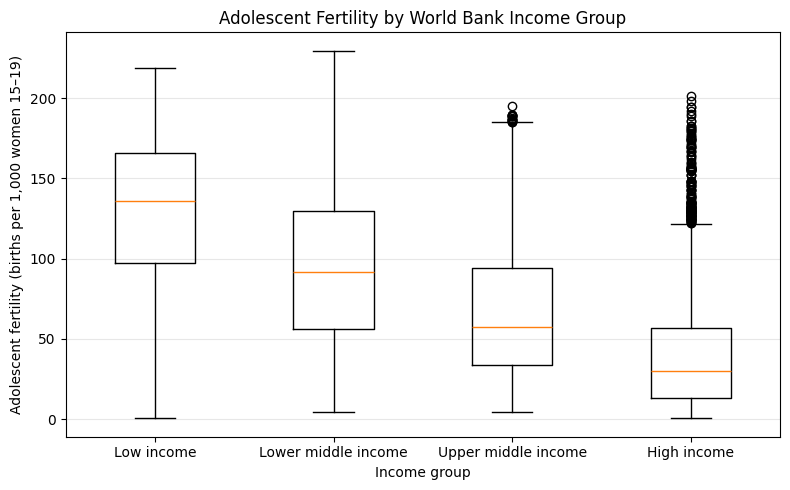

In [113]:
# Make sure income_group is not missing
plot_data = df_clean.dropna(subset=["income_group"])

# Order income groups if you want a logical order
income_order = ["Low income", "Lower middle income", "Upper middle income", "High income"]
plot_data["income_group"] = pd.Categorical(
    plot_data["income_group"],
    categories=income_order,
    ordered=True
)

plt.figure(figsize=(8, 5))

# Create a boxplot for each income group
box_data = [plot_data[plot_data["income_group"] == g]["adolescent_fertility"]
            for g in income_order if g in plot_data["income_group"].unique()]

labels = [g for g in income_order if g in plot_data["income_group"].unique()]

plt.boxplot(box_data, labels=labels)

plt.xlabel("Income group")
plt.ylabel("Adolescent fertility (births per 1,000 women 15–19)")
plt.title("Adolescent Fertility by World Bank Income Group")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.savefig("website/figs/box_plot.png", dpi=300, bbox_inches="tight")
plt.show()


#### 3. Time-series plot of mean adolescent fertility by income group

The third visualization is a line plot showing the mean adolescent fertility rate for each year and each World Bank income group. For every year from 1960 to 2023, we compute the average adolescent fertility within each income category (High income, Upper middle income, Lower middle income, Low income, and a small “Unknown” group) and plot one line per group.

The figure shows a clear global decline in adolescent fertility over time for all income groups. However, the levels are very different. Low-income countries have the highest mean adolescent fertility throughout the entire period, starting above 140 births per 1,000 women aged 15–19 in the early 1960s and decreasing to around the 90s by the early 2020s. Lower-middle-income countries are consistently below low-income countries but still much higher than upper-middle- and high-income countries. Upper-middle-income countries follow a similar downward pattern at intermediate levels. High-income countries have the lowest adolescent fertility rates at all times, starting around the mid-60s in 1960 and steadily declining to below 20 in recent years. The “Unknown” group lies between the lower-middle and upper-middle lines but also declines over time. Overall, the plot highlights both global progress and persistent inequality: all groups are moving downward, but the gaps between income levels remain large.

**Customizations:**  
We plotted a separate line for each income group and added a legend labeled “Income group” to clearly identify them. We used the full time range from 1960 to 2023 on the x-axis and kept a common y-axis scale so that differences in levels are easy to compare across groups. We also applied a light grid to make it easier to read values and observe the parallel downward trends.


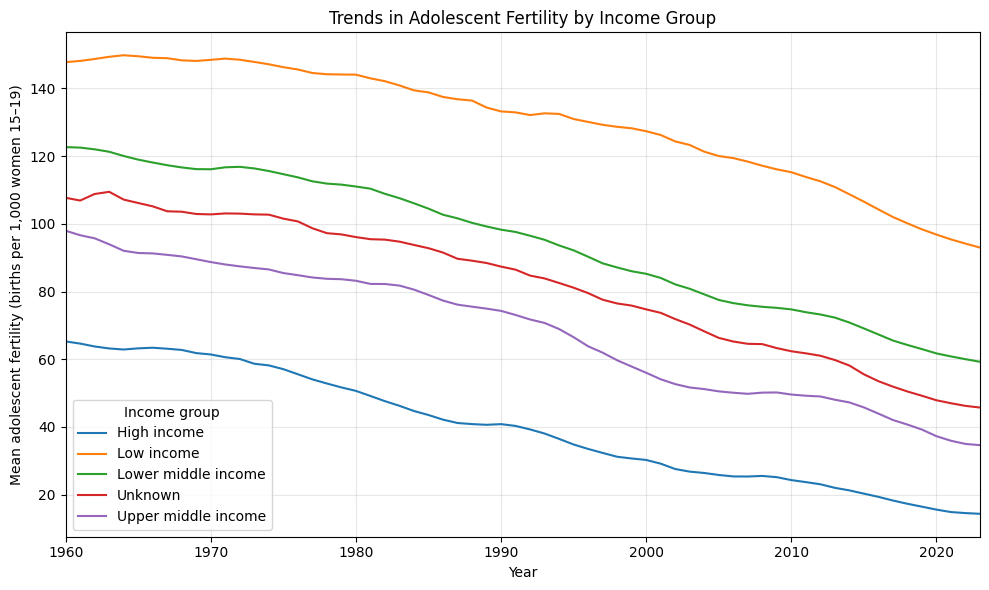

In [114]:
# Compute mean fertility by income group and year
income_year_trends = (
    df_clean
    .dropna(subset=["income_group"])
    .groupby(["income_group", "Year"], as_index=False)["adolescent_fertility"]
    .mean()
    .rename(columns={"adolescent_fertility": "mean_fertility"})
)

plt.figure(figsize=(10, 6))

for group, group_df in income_year_trends.groupby("income_group"):
    group_df = group_df.sort_values("Year")
    plt.plot(group_df["Year"], group_df["mean_fertility"], label=group)

plt.xlabel("Year")
plt.ylabel("Mean adolescent fertility (births per 1,000 women 15–19)")
plt.title("Trends in Adolescent Fertility by Income Group")
plt.xlim(1960, 2023)   # adjust if you want full 1960–2024
plt.grid(alpha=0.3)
plt.legend(title="Income group")

plt.tight_layout()
plt.savefig("website/figs/line_income_group.png", dpi=300, bbox_inches="tight")
plt.show()


#### 4. Time-series plot of adolescent fertility for selected countries

The fourth visualization is a line plot of adolescent fertility over time for four representative countries: Brazil (upper-middle income), Ethiopia (low income), India (lower-middle income), and Japan (high income). For each country, we plot the adolescent fertility rate from 1960 to 2023 and connect the yearly points with lines.

From this figure, we can see very different levels and trends. Ethiopia starts at extremely high adolescent fertility (above 120 births per 1,000 women 15–19) and remains high for many decades before gradually declining, but it is still relatively high in recent years. India also starts at high levels but shows a very strong decline after around the 1990s and early 2000s, eventually reaching much lower fertility. Brazil begins at medium levels and shows a steady decline over time. Japan, in contrast, has very low adolescent fertility throughout the entire period, with only small fluctuations around a low baseline. Together, these four trajectories illustrate the large global inequality in adolescent fertility and how some countries have seen much faster declines than others.

**Customizations:**  
We chose one country from each income group so that the plot covers low-, lower-middle-, upper-middle-, and high-income settings. We used different colors and markers for each country and added a legend to clearly distinguish the lines. We also fixed the x-axis to the full period 1960–2023 and set the y-axis range so that all four series are visible on the same scale, which makes differences in levels and trends easier to compare.


In [115]:
# Count how many non-missing fertility years each country has
country_counts = (
    df_clean
    .groupby(["country_name", "income_group"], as_index=False)["adolescent_fertility"]
    .count()
    .rename(columns={"adolescent_fertility": "n_years"})
)

# Look at the top countries in each income group
country_counts.sort_values(["income_group", "n_years"], ascending=[True, False]).head(20)

,country_name,income_group,n_years
5,American Samoa,High income,64
6,Andorra,High income,64
8,Antigua and Barbuda,High income,64
12,Aruba,High income,64
13,Australia,High income,64
14,Austria,High income,64
16,"Bahamas, The",High income,64
17,Bahrain,High income,64
19,Barbados,High income,64
21,Belgium,High income,64


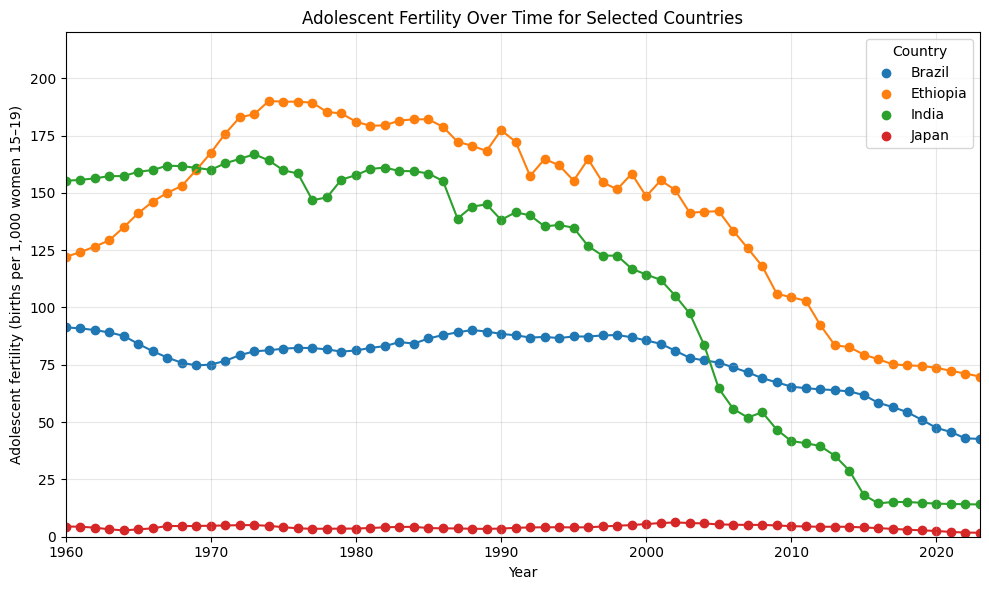

In [116]:
import matplotlib.pyplot as plt

# 1. Pick representative countries
selected_countries = [
    "Ethiopia",   # low income, high fertility
    "India",      # lower middle income, strong decline
    "Brazil",     # upper middle income, medium level
    "Japan"       # high income, very low fertility
]

# 2. Filter and sort data for those countries
country_subset = (
    df_clean[df_clean["country_name"].isin(selected_countries)]
    .copy()
    .sort_values(["country_name", "Year"])
)

# 3. Scatter + line plot for each country
plt.figure(figsize=(10, 6))

for country, group in country_subset.groupby("country_name"):
    plt.scatter(
        group["Year"],
        group["adolescent_fertility"],
        label=country
    )
    # connect the points with a line to show the trend
    plt.plot(
        group["Year"],
        group["adolescent_fertility"
        ]
    )

plt.xlabel("Year")
plt.ylabel("Adolescent fertility (births per 1,000 women 15–19)")
plt.title("Adolescent Fertility Over Time for Selected Countries")
plt.xlim(1960, 2023)   # adjust if you want full 1960–2024
plt.ylim(0, 220)       # adjust based on your data range
plt.grid(alpha=0.3)
plt.legend(title="Country")

plt.tight_layout()
plt.savefig("website/figs/fertility rate by countries.png", dpi=300, bbox_inches="tight")
plt.show()


#### 5. World map of adolescent fertility in 1960

The fifth visualization is a choropleth world map showing adolescent fertility rates in **1960**, the first year in the dataset. Each country is colored according to its adolescent fertility rate in that year, using a continuous color scale where darker colors represent higher fertility.

This map provides a baseline view of the global situation at the start of the time period. Many countries, especially in low-income regions, have very high adolescent fertility in 1960, while a smaller number of countries in higher-income regions already show lower levels. The map highlights how widespread high adolescent fertility was at the beginning of the period.

**Customizations:**  
We used ISO3 country codes to link the data to map shapes and chose a color scale that clearly distinguishes low, medium, and high fertility levels. We also set the colorbar label to “Births per 1,000 women 15–19” and filtered out countries with missing data for 1960 so that the map only shows valid values. We kept the projection and layout consistent with the later map so that visual comparison over time is straightforward.

In [117]:
import plotly.express as px

year_to_plot = 1960 

df_map = (
    df_clean
    .query("Year == @year_to_plot")
    .dropna(subset=["adolescent_fertility"])
)

print("Number of countries used in map:", df_map["country_code"].nunique())

# choropleth map
fig_1960 = px.choropleth(
    df_map,
    locations="country_code",          
    color="adolescent_fertility",      
    hover_name="country_name",         
    color_continuous_scale="YlOrRd",   
    projection="natural earth",
    title=f"Adolescent fertility (births per 1,000 women 15–19) in {1960}"
)


fig_1960.update_coloraxes(
    colorbar_title="Births per 1,000 women 15–19",
    cmin=0)

fig_1960.show()


Number of countries used in map: 265


In [118]:
fig_1960.write_html(
    "website/figs/map_1960.html",
    include_plotlyjs="cdn",
    full_html=False
)

#### 6. World map of adolescent fertility in 2023

The sixth visualization is another choropleth world map, but for **2023**, one of the most recent years in the dataset. The structure is the same as in the 1960 map, with each country colored by its adolescent fertility rate.

This map shows the current or near-current situation and can be directly compared to the 1960 map. The overall pattern indicates that adolescent fertility has decreased substantially in many parts of the world, especially in upper-middle- and high-income regions. However, some countries and regions, particularly in Sub-Saharan Africa and certain lower-income areas, still display high adolescent fertility rates. Comparing the 1960 and 2023 maps makes it clear that global progress has been uneven and that large geographic disparities remain.

**Customizations:**  
To make the two maps comparable, we used the same color scale and similar value range for both years. This ensures that differences in color reflect real changes in fertility rates rather than differences in plotting settings. We also used consistent map projections, titles, and legends, so that viewers can quickly understand that the two maps show the same variable at two different points in time and focus on the changes in the spatial pattern.

In [119]:
import plotly.express as px

fig_2023 = px.choropleth(
    df_map,
    locations="country_code",          
    color="adolescent_fertility",      
    hover_name="country_name",        
    color_continuous_scale="YlOrRd",   
    projection="natural earth",
    title=f"Adolescent fertility (births per 1,000 women 15–19) in {2023}"
)


fig_2023.update_coloraxes(
    colorbar_title="Births per 1,000 women 15–19",
    cmin=0)

fig_2023.show()

fig_2023.write_html(
    "website/figs/map_2023.html",
    include_plotlyjs="cdn",
    full_html=False
)
